<a href="https://colab.research.google.com/github/hazelkimhyejin/DEMO/blob/main/CT2011_Lab_02_Worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **(1) Insurance Claims -- Exploratory Data Analysis**

Data Set

* **Age** :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

* **Sex** :- This is the policy holder's gender, either male or female.

* **BMI** :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.

* **Children** :- This is an integer indicating the number of children / dependents covered by the insurance plan.

* **Smoker** :- This is yes or no depending on whether the insured regularly smokes tobacco.

* **Region** :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.

* **Charges**​ :- Individual medical costs billed to health insurance

## **Import CSV file**



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# read the relevant csv file
path = 'https://raw.githubusercontent.com/timcyku/ct2011/refs/heads/main/insurance.csv'

df = pd.read_csv(path)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **EDA (Univariate Analysis)**

Histograms & boxplots for individual variables




In [7]:
def dist(data, column):
    Name=column.upper()
    fig, ax = plt.subplots(2,1, figsize=(7, 5))
    fig.suptitle("Distribution for "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data[column],color="violet", ax = ax[0])
    ax[0].set(xlabel='')
    sns.histplot(data, x=column,color='blue', stat='probability')


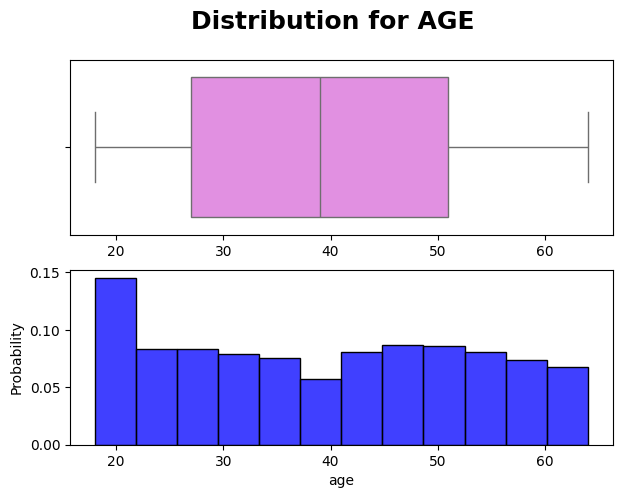

In [8]:
dist(df, 'age')


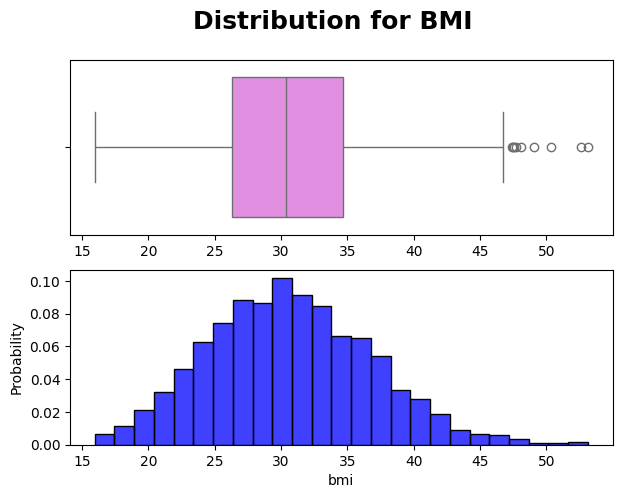

In [9]:
dist(df, 'bmi')

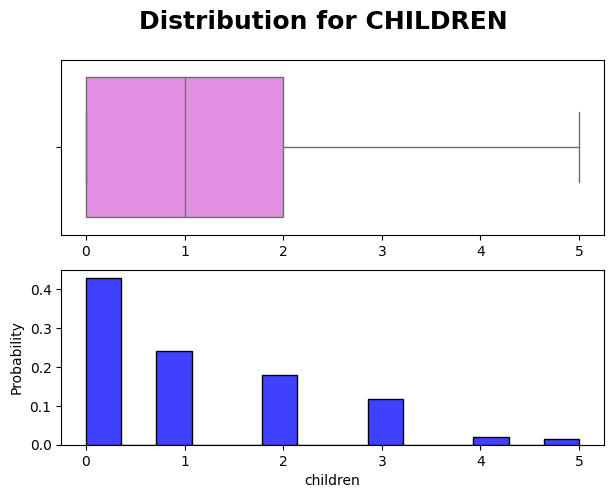

In [10]:
dist(df, 'children')


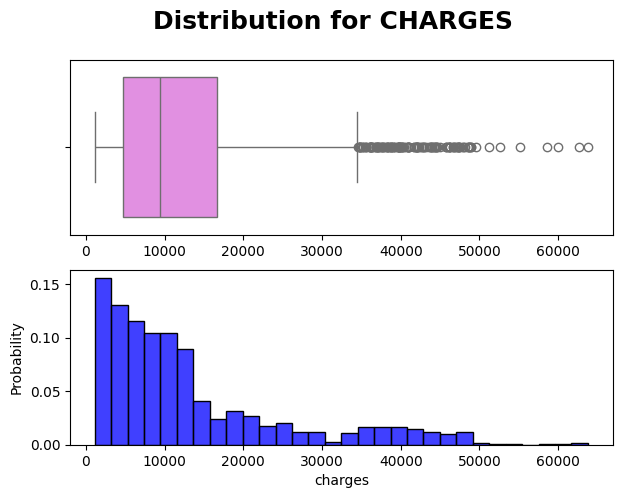

In [11]:
dist(df, 'charges')

## **EDA (Bivariate Analysis)**


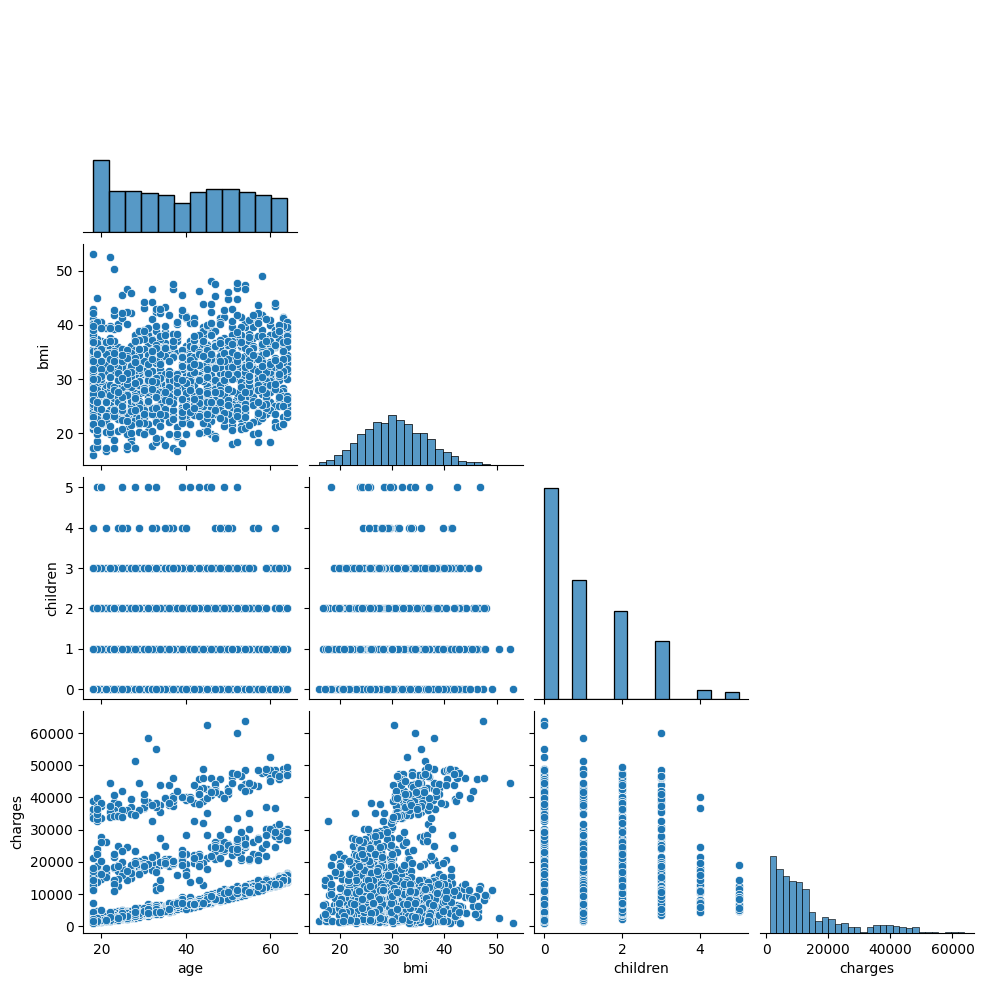

In [12]:
sns.pairplot(data=df , corner=True)
plt.show()

[Text(0.5, 1.0, 'Sex vs Charges')]

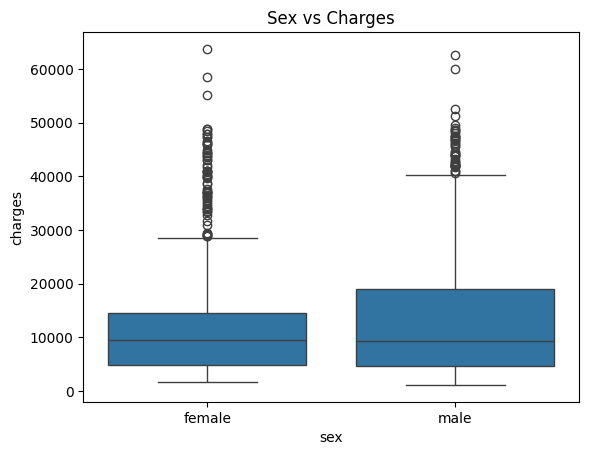

In [13]:
# sex vs charges
sns.boxplot(x=df.sex,y=df.charges).set(title="Sex vs Charges")

[Text(0.5, 1.0, 'Smoker vs Charges')]

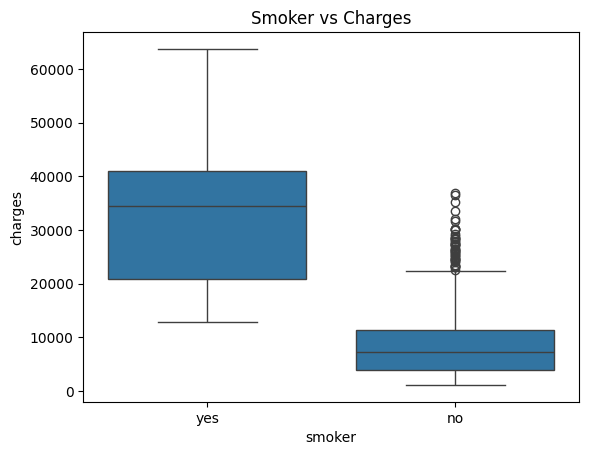

In [14]:
# smoker vs charges
sns.boxplot(x=df.smoker,y=df.charges).set(title="Smoker vs Charges")

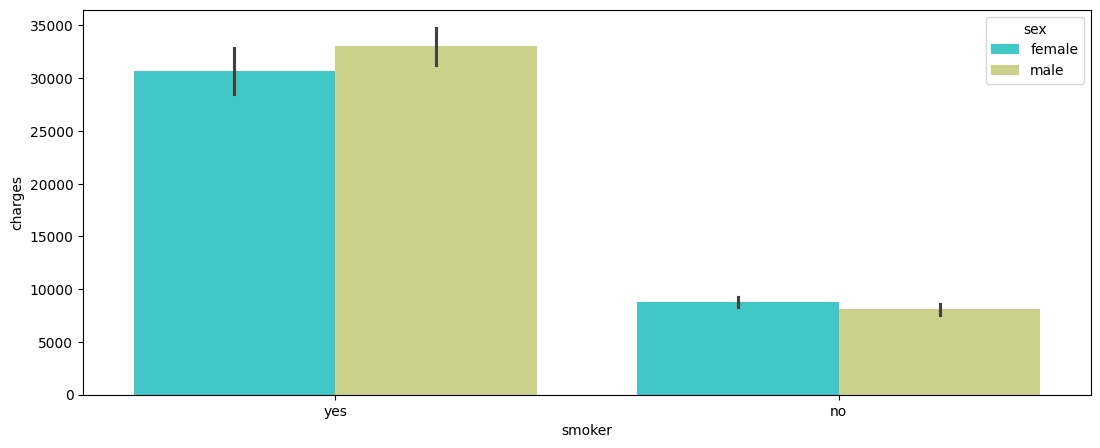

In [15]:
# smoker+sex vs charges
plt.figure(figsize=(13,5))
ax=sns.barplot(y='charges', x='smoker', hue='sex',data=df,palette='rainbow')

[Text(0.5, 1.0, 'Region vs Charges')]

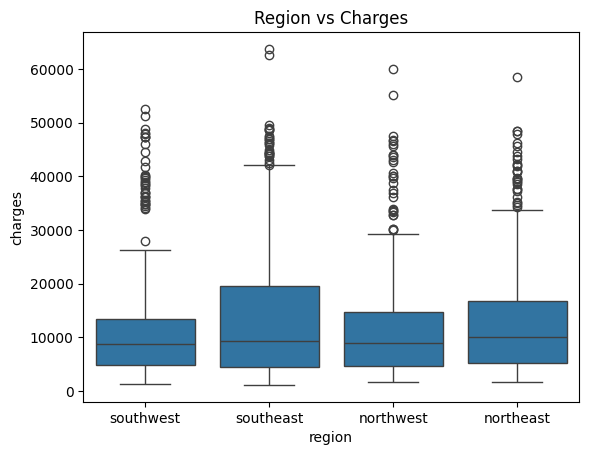

In [16]:
# region vs charges
sns.boxplot(x=df.region,y=df.charges).set(title="Region vs Charges")

[Text(0.5, 1.0, 'Region vs Smokers/Non-Smokers')]

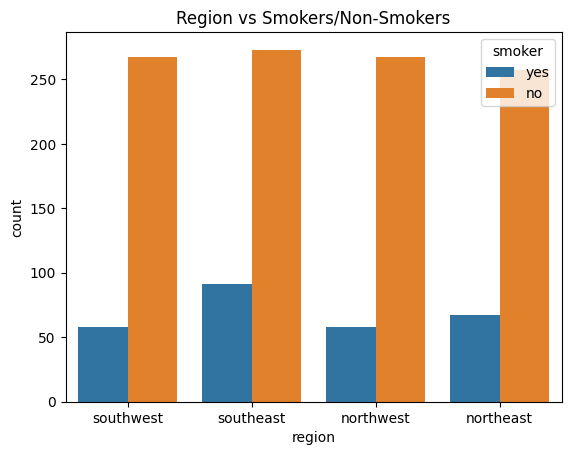

In [17]:
# region vs bmi
sns.countplot(x=df.region, hue=df.smoker).set(title="Region vs Smokers/Non-Smokers")

In [18]:
#creating groups of bmi
category=pd.cut(df.bmi,bins=[15,25,35,45,55],labels=['15-25','25-35','35-45','45-55'])
df.insert(5,'BMIGroup',category)

[Text(0.5, 1.0, 'BMIGroup vs Charges')]

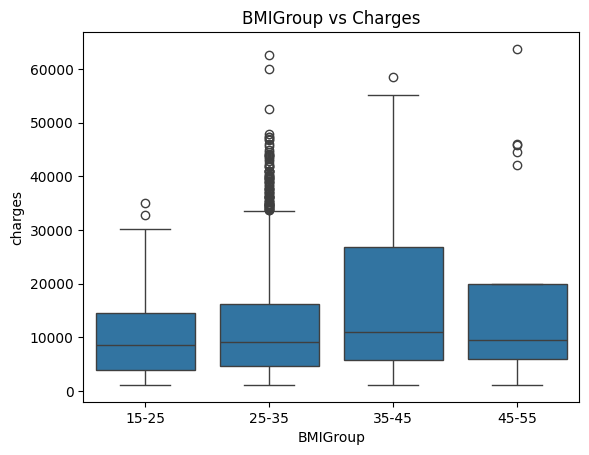

In [19]:
# bmigroups vs charges
sns.boxplot(x=df.BMIGroup,y=df.charges).set(title="BMIGroup vs Charges")

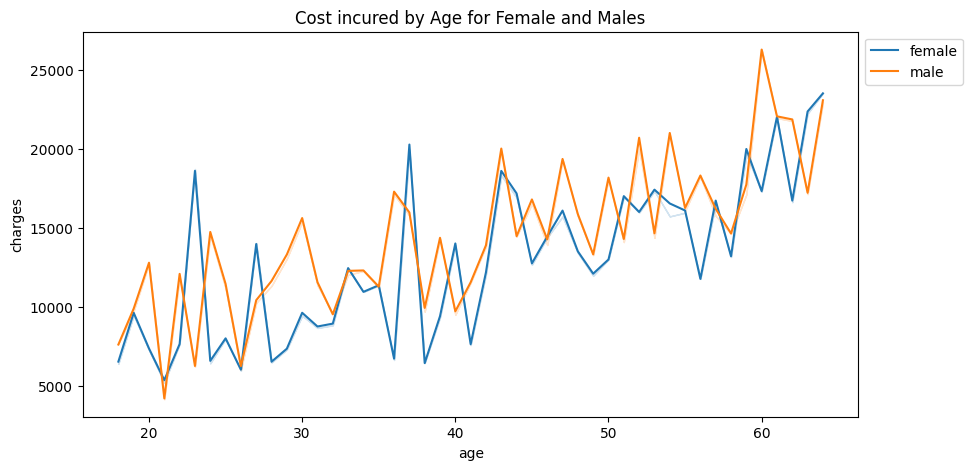

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df, x='age', y='charges',hue='sex', errorbar=('ci', 0)).set(title= 'Cost incured by Age for Female and Males')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

## **Correlation**


In [21]:
df2 = df[['age', 'bmi', 'charges']]

In [22]:
df2.corr()

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


# **(2) Hypothesis Testing: Mean of ONE category**


**Question: Is the popluation mean equal to $\mu_0$?**

* State null hypothesis
H0 : Population mean is $\mu_0$.

* State alternate hypothesis
H1 : Population mean is not $\mu_0$.

**ttest_1samp**

* Calculate the T-test for the mean of ONE group of scores.

* This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean.

* The data from each population should be approximately normally distributed.  For very large sample sizes, this assumption can be relaxed.
* Reject H0 if p-value < 0.05


In [23]:
# test for normality
from scipy.stats import shapiro
def normality_check(series, alpha=0.05):
    _, p_value = shapiro(series)
    print(f'p value = {p_value}')
    if p_value >= alpha:
        print('We fail to reject the Null Hypothesis Ho (data is normal)')
    else:
        print('We reject the Null Hypothesis Ho (data is normal)')

In [24]:
normality_check(df.bmi)

p value = 2.60468368798344e-05
We reject the Null Hypothesis Ho (data is normal)


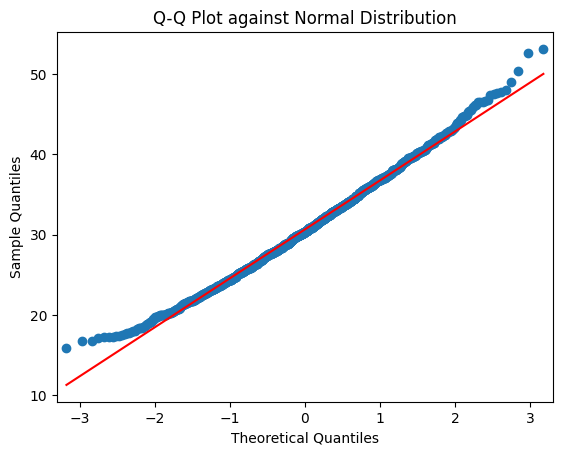

In [25]:
import statsmodels.api as sm
fig = sm.qqplot(df.bmi, line='s') # 's' for standardized line (y=x)
plt.title('Q-Q Plot against Normal Distribution')
plt.show()

In [26]:
df.bmi.mean()

np.float64(30.66339686098655)

## **BMI Mean**

**Question: Is the population BMI mean 30?**

* State null hypothesis
H0 : Population BMI mean is 30.

* State alternate hypothesis
H1 : Population BMI mean is not 30.

In [27]:
import scipy.stats as stats
#executing the independent t-test to run tests on single variable
popmean = 30
t_stat, p_value = stats.ttest_1samp(df.bmi, popmean)

# Setting our significance level at 5%
if p_value < 0.05:
    print(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis')
    print(f'The population mean of', df.bmi.name,'is significantly different from', popmean)
else:
    print(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis')
    print(f'The population mean of',  df.bmi.name, 'is not significantly different from', popmean)

As the p_value **(7.284478321088481e-05) < 0.05**, we reject the Null Hypothesis
The population mean of bmi is significantly different from 30


# **(3) Hypothesis Testing: Comparing Means of TWO categories**

**Question: Are the means of the two groups significantly different?**


* State null hypothesis
H0 : Means of the two groups are not significantly different.

* State alternate hypothesis
H1 : Means of th etwo groups are significantly different.

**ttest_ind**

* Calculate the T-test for the means of two independent samples of scores.

* This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default. If the population variances are significantly unequal, Welch's t-test is used instead.

* The data from each population should be approximately normally distributed.  For very large sample sizes, this assumption can be relaxed.

* Reject H0 if p-value < 0.05

## **BMI for people with children**


**Question: Does the average bmi of people without children significantly from the people who have children?**

State null hypothesis
H0 : Mean BMI of people without children is the same as that of people with at least a child.

State alternate hypothesis
H1 : Mean of BMI of people without children is significantly different from that of people with at least one child.

**ttest_ind**

* Calculate the T-test for the means of two independent samples of scores.

* This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default. If the population variances are significantly unequal, Welch's t-test is used instead.

* The data from each population should be approximately normally distributed.  For very large sample sizes, this assumption can be relaxed.

In [28]:
import scipy.stats as stats

#Split the bmi column into two parts

X = np.array(df[df.children ==0].bmi) #no children
Y = np.array(df[df.children > 0].bmi) #has children

In [29]:
X.var()-Y.var()

np.float64(-1.301597578918546)

In [30]:
#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X,Y, equal_var=False)

# Setting our significance level at 5%
if p_value < 0.05:
    print(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis')
    print(f'The mean bmi of people with and without children are significantly different')
else:
    print(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis')
    print(f'The mean bmi of people with and without children are NOT significantly different')

As the p_value **(0.5557400228651652) > 0.05**, we fail to reject Null Hypothesis
The mean bmi of people with and without children are NOT significantly different


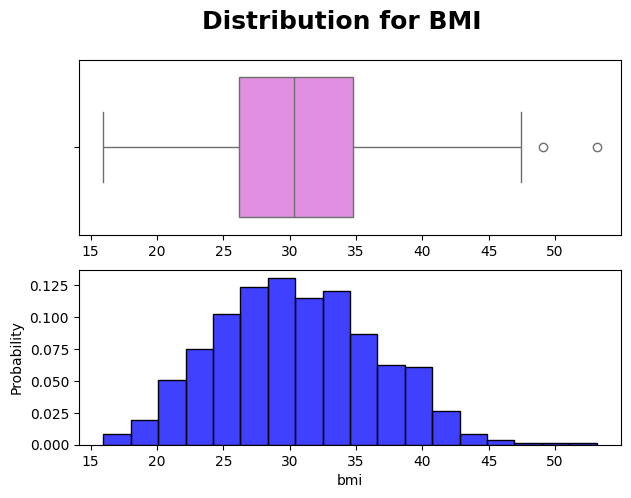

In [31]:
dist(df[df.children==0], 'bmi')

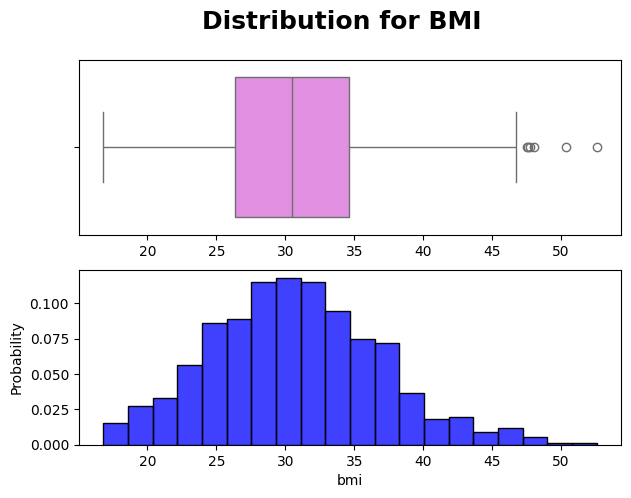

In [32]:
dist(df[df.children>0], 'bmi')

# **(3) Hypothesis Testing: Association between TWO categories**

**Question: Is there a significant association between two categories?**

* State null hypothesis
H0 : The two categorical variables are independent (i.e., there is no relationship between them).

* State alternate hypothesis
H1 : The two categorical variables are not independent (i.e., they are related/associated).

**chi2_contingency**

* first construct contigency_table using pd.crosstab
* chi2, p_value, dof, expected = chi2_contingency(contingency_table)
* Reject H0 if p_value < 0.05

In [33]:
from scipy.stats import chi2_contingency
# Associatio between smokers and sex
contingency_table= pd.crosstab(df['smoker'], df['sex'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Setting our significance level at 5%
if p_value < 0.05:
    print(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis')
    print(f'The variable smoker and sex are related.')
else:
    print(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis')
    print(f'The variable smoker and sex do not have significant association.')



As the p_value **(0.006548143503580696) < 0.05**, we reject the Null Hypothesis
The variable smoker and sex are related.


# **(4) Practice: Hypothesis Testing (Insurance claim)-- Smokers Vs Non-smokers**

**Question: Does the average charges of people who smoke differ significantly from that of those who don't?**

State null hypothesis
H0 : Charges of smokers and non-smokers have the same mean (average)

State alternate hypothesis
H1 : The mean charges of smokers and non-smokers are **significantly different**

In [36]:
import scipy.stats

X2 = np.array(df[df.smoker == 'yes'].charges) #Smokers
Y2 = np.array(df[df.smoker == 'no'].charges) #Non-smokers

X2.var()-Y2.var()

np.float64(96829497.13308881)

#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X2, Y2, equal_var=False)

#Setting our significance level at 5%
if p_value < 0.05:
    print(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis')
    print(f'The mean charges of smokers and non-smokers are significantly different')

As the p_value **(5.88946444671698e-103) < 0.05**, we reject the Null Hypothesis
The mean charges of smokers and non-smokers are significantly different


# **(5) Practice: Hypothesis Testing (Insurance claim) -- Male Vs Female**

**Question: Does the average charges of males differ significantly from that of females?**

State null hypothesis
H0 : Charges of males and females have the same mean (average)

State alternate hypothesis
H1 : The mean charges of males and females are **significantly different**

In [37]:
import scipy.stats

#Split the charges column into two parts between male and female
X3 = np.array(df[df.sex == 'male'].charges) #Male
Y3 = np.array(df[df.sex == 'female'].charges) #Female

X3.var()-Y3.var()

np.float64(96829497.13308881)

#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X3, Y3, equal_var=False)

#Setting our significance level at 5%
if p_value < 0.05:
    print(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis')
    print(f'The mean charges of males and females are significantly different')

As the p_value **(0.03584101495601664) < 0.05**, we reject the Null Hypothesis
The mean charges of males and females are significantly different


# **(5) Exercise: Student Performance**

The notebook for the exercise will be available during lesson:

https://drive.google.com/file/d/1E9Bo93VUpgySffLBjjcoEdvw2b57vkRc/view?usp=sharing

